In this notebook we are load our preprocess data which we done in our previous part and now will train the model on different linear regression algorithms

### Step 1: Import all the required libraries

#### Pandas : 
In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series

#### Sklearn :
 Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.

#### Pickle : 
Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

#### Seaborn :
 Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# import all required libraries
import numpy as np
import pandas as pd
import pickle
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings
from sklearn import preprocessing
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# Read preprocess csv file
df = pd.read_csv('E:\\python program\\FinalProject\\TSLA(1)(3).csv')

In [3]:
# Drop Unnamed: 0 column 
df = df.drop('Unnamed: 0',axis=1)

In [4]:
# View first 5 rows
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-01-02,20.406668,21.008667,19.920000,20.674667,174879000
1,2019-01-03,20.466667,20.626667,19.825333,20.024000,104478000
2,2019-01-04,20.400000,21.200001,20.181999,21.179333,110911500
3,2019-01-07,21.448000,22.449333,21.183332,22.330667,113268000
4,2019-01-08,22.797333,22.934000,21.801332,22.356667,105127500


Step 2: Data Preparation

Goal:-

Tasks we are going to in this step

1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset
3. Scaling on train dataset

#### 1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.

In [5]:
# Spearate target and feature column in X and y variable
# Spearate target and feature column in X and y variable
X=df[['Open','High','Low','Volume']].values
y=df['Close'].values

In [6]:
# Check the shape of X and y variable
X.shape, y.shape

((723, 4), (723,))

In [7]:
# Reshape the y variable 
y = y.reshape((y.shape[0],1))

In [8]:
# Again check the shape of X and y variable
X.shape, y.shape

((723, 4), (723, 1))

2. Split dataset into train and test dataset

Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training and 20% goes into testing the part.

In [9]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((578, 4), (145, 4), (578, 1), (145, 1))

### Step 3: Model Training

Goal:- 

In this step we are going to train our dataset on different linear regression algorithms. As we know that our target variable is in continous format so we have to apply linear regression algoritms.
Algorithms we are going to use in this step.

1.Linear Regression 

2.Ridge Regression 

2.Lasso Regression 

4.Principal Components Regression

Define cross-validation folds

In [11]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

(1) Linear Regression 

Train set cross-validation

In [12]:
# define linear regression model object
lin_reg = LinearRegression()

In [13]:
# train or fit train dataset on linear regression model
lin_reg = lin_reg.fit(X_train, y_train)

In [14]:
# Get R2 score
lin_reg.score(X_train, y_train)

0.9996150697559743

In [15]:
# get kfold values
lr_scores = -1 * cross_val_score(lin_reg, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lr_scores

array([1.96896952, 2.27828707, 1.94096722, 1.93028958, 2.92502182,
       1.81105276, 2.89898764, 1.77582463, 1.40532248, 2.64654027])

In [16]:
# mean of the train kfold scores
lr_score_train = np.mean(lr_scores)
lr_score_train

2.158126298640017

Predict

In [17]:
# predict the values on X_test_scaled dataset 
y_predicted = lin_reg.predict(X_test)

In [18]:
# RMSE between y_test and y_predicted values
lr_score_test = mean_squared_error(y_test, y_predicted, squared=False) # RMSE instead of MSE
lr_score_test

2.235752378038293

In [19]:
#combining the Actual and Predicted data to match
data=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted' :y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,66.059998,65.835474
1,233.199997,228.087677
2,214.883331,214.931080
3,19.415333,19.611774
4,136.166672,134.827067
5,143.316666,142.202344
6,18.153999,18.140793
7,14.328000,14.332732
8,36.480000,36.447115
9,294.363342,292.915707


In [20]:
graph=data.head(20)

<AxesSubplot: >

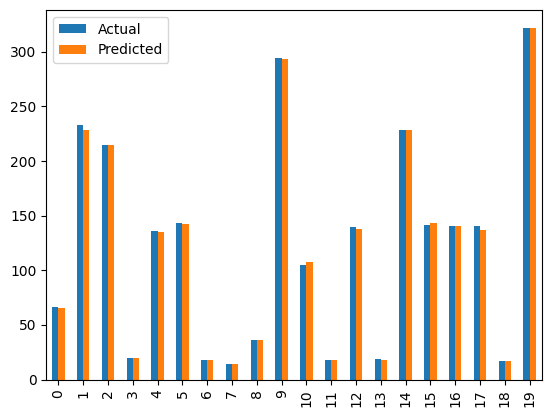

In [21]:
graph.plot(kind='bar')

(2) Ridge Regression 

Train set cross-validation

In [22]:
# define Ridge regression model object
ridge_reg=Ridge(alpha=10)

In [23]:
# train or fit train dataset on linear regression model
ridge_reg = ridge_reg.fit(X_train, y_train)

In [24]:
# Get R2 score
ridge_reg.score(X_train, y_train)

0.9996150623809538

In [25]:
# get kfold values
ridge_scores = -1 * cross_val_score(ridge_reg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
ridge_scores

array([1.9664988 , 2.27860731, 1.94189036, 1.93098266, 2.92952093,
       1.81249721, 2.8970803 , 1.77843598, 1.40574639, 2.64307618])

In [26]:
# mean of the train kfold scores
ridge_score_train = np.mean(ridge_scores)
ridge_score_train

2.158433613124328

Predict

In [27]:
# predict the values on X_test_scaled dataset 
y_predicted = ridge_reg.predict(X_test)

In [28]:
# RMSE between y_test and y_predicted values
ridge_score_test = mean_squared_error(y_test, y_predicted, squared=False)
ridge_score_test

2.232772311884631

In [29]:
graph=data.head(20)

<AxesSubplot: >

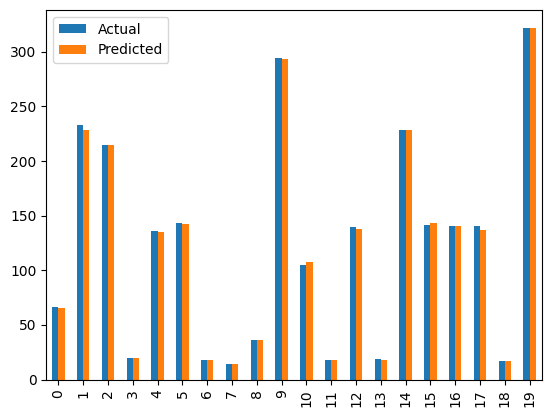

In [30]:
graph.plot(kind='bar')

(3) Lasso Regression

Train set cross-validation

In [31]:
# define lasso regression model object
lasso_reg=Lasso(alpha=0.001)

In [32]:
# train or fit train dataset on lasso regression model
lasso_reg=lasso_reg.fit(X_train,y_train)

In [33]:
# Get R2 score
lasso_reg.score(X_train, y_train)

0.9992250167760485

In [34]:
# get kfold values
lasso_scores = -1 * cross_val_score(lasso_reg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
lasso_scores

array([2.54147186, 2.84539812, 2.88334248, 2.85815161, 6.54422654,
       2.42966911, 3.05019867, 2.37097885, 2.1755691 , 3.32559628])

In [35]:
# mean of the train kfold scores
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

3.1024602622258914

Predict

In [36]:
# predict the values on X_test_scaled dataset 
y_predicted = lasso_reg.predict(X_test)

In [37]:
# RMSE between y_test and y_predicted values
lasso_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lasso_score_test

2.6559500401739338

In [38]:
#combining the Actual and Predicted data to match
data=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted' :y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,66.059998,64.194273
1,233.199997,230.048393
2,214.883331,217.752761
3,19.415333,19.928340
4,136.166672,135.640560
5,143.316666,143.445462
6,18.153999,18.279772
7,14.328000,14.362819
8,36.480000,35.790517
9,294.363342,294.205698


In [39]:
graph=data.head(20)

<AxesSubplot: >

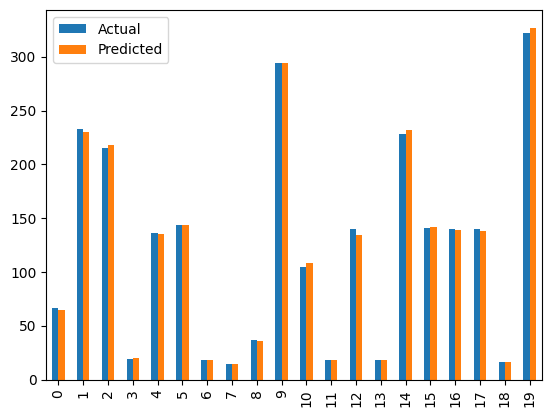

In [40]:
graph.plot(kind='bar')

(4) Principal Components Regression

Evaluate for different number of principal components

In [41]:
lin_reg = LinearRegression()
rmse_list = []

In [42]:
# First generate all the principal components
pca = PCA()
X_train_pc = pca.fit_transform(X_train)
X_train_pc.shape

(578, 4)

In [43]:
# View explained variance ratio for each principal component
pca.explained_variance_ratio_

array([1.00000000e+00, 5.71767882e-12, 1.53146304e-15, 8.74521784e-16])

In [44]:
# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3
0,-6.234794e-07,0.577802,5.061490e-01,-6.402797e-01
1,-6.250895e-07,0.592163,2.799006e-01,7.556449e-01
2,-6.214716e-07,0.561684,-8.157627e-01,-1.379954e-01
3,1.000000e+00,0.000001,-1.643692e-08,-1.261581e-08


In [45]:
# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

In [46]:
rmse_list

[100.48084667687138, 3.6196080005551132, 3.164772030120684, 2.1581262976696385]

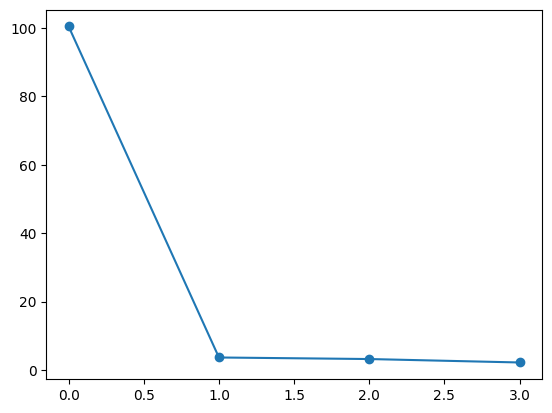

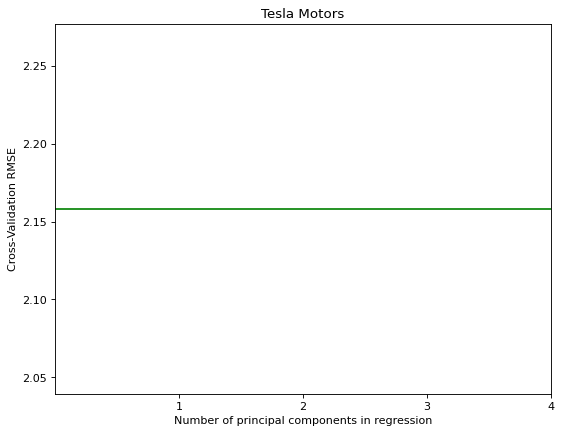

In [47]:
# Plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
figure(figsize=(8, 6), dpi=80)
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('Tesla Motors')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

In [48]:
# Visually determine optimal number of principal components
best_pc_num = 31


Predict

In [49]:
# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [50]:
# Get R2 score
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.9996150697559743

In [51]:
# get kfold values
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()
pcr_score_train

2.1581262976696385

In [52]:
# Get principal components of test set
X_test_pc = pca.transform(X_test)[:,:best_pc_num]
X_test_pc.shape

(145, 4)

In [53]:
# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)
pcr_score_test

2.235752378966441

In [54]:
#combining the Actual and Predicted data to match
data=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted' :preds.flatten()})
data.head(20)

,Actual,Predicted
0,66.059998,65.835475
1,233.199997,228.087677
2,214.883331,214.931080
3,19.415333,19.611774
4,136.166672,134.827067
5,143.316666,142.202344
6,18.153999,18.140793
7,14.328000,14.332732
8,36.480000,36.447115
9,294.363342,292.915707


In [55]:
graph=data.head(20)

<AxesSubplot: >

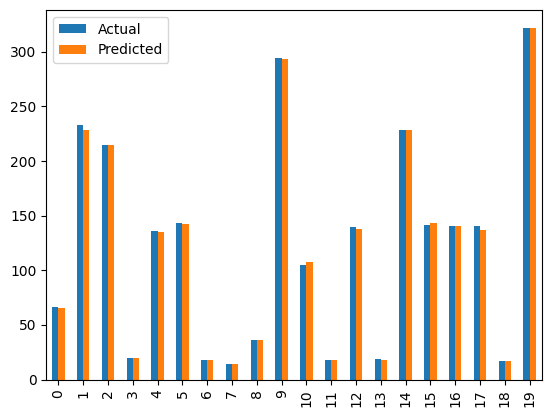

In [56]:
graph.plot(kind='bar')

Evaluation

In [57]:
train_metrics = np.array([round(lr_score_train,3),
                        round(lasso_score_train,3), 
                        round(ridge_score_train,3), 
                        round(pcr_score_train,3)]) 
train_metrics = pd.DataFrame(train_metrics, columns=['RMSE (Train Set)'])
train_metrics.index = ['Linear Regression', 
                        'Lasso Regression', 
                       'Ridge Regression', 
                       f'PCR ({best_pc_num} components)']
train_metrics

,RMSE (Train Set)
Linear Regression,2.158
Lasso Regression,3.102
Ridge Regression,2.158
PCR (31 components),2.158


In [58]:
test_metrics = np.array([round(lr_score_test,3), 
                        round(lasso_score_test,3), 
                         round(ridge_score_test,3), 
                         round(pcr_score_test,3)]) 
test_metrics = pd.DataFrame(test_metrics, columns=['RMSE (Test Set)'])
test_metrics.index = ['Linear Regression', 
                        'Lasso Regression', 
                      'Ridge Regression', 
                      f'PCR ({best_pc_num} components)']
test_metrics

,RMSE (Test Set)
Linear Regression,2.236
Lasso Regression,2.656
Ridge Regression,2.233
PCR (31 components),2.236


Step 3 Insights/Results/Summary:-

From above result we can clearly see that RMSE of Linear Regression is very compared to other algorithms. for prediction we can use Lasso Regression as that has minimum RMSE

Step 4: Save Model

Goal:- 
In this step we are going to save our model in pickel format file.

In [61]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(ridge_reg, open('Teslastockprice.pkl', 'wb'))

Step 4 Insights/Results/Summary:-

in this step we save our model in pickel file format so we can use it now anywhere for prediction purpose